## Module 5

In this assignment, you are going to work on Histograms and Scatterplots.

We have preprocessed the data as "df" for you. 

Follow the instructions and finish the rest part.

In [1]:
%%capture
###########################################################
### EXECUTE THIS CELL BEFORE YOU TO TEST YOUR SOLUTIONS ###
###########################################################
import imp, os, sys
sol = imp.load_compiled("solutions", "./solutions.py")
sol.get_solutions("imdb.xlsx")
from nose.tools import assert_equal
from pandas.util.testing import assert_frame_equal, assert_series_equal

In [2]:
# Loading the data
import pandas as pd
import numpy as np

xls = pd.ExcelFile('imdb.xlsx')
df = xls.parse('imdb')
df_directors = xls.parse('directors')
df_countries = xls.parse('countries')

df = pd.merge(left=df, right=df_countries, 
              how='inner', left_on='country_id', 
              right_on='id')

df = pd.merge(left=df, right=df_directors, 
              how='inner', left_on='director_id', 
              right_on='id')

print("Finished.")

Finished.


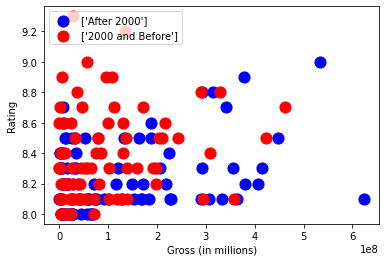

In [3]:
"""Q1: 
Is how much a movie makes indicative of how good it is?
Make a simple scatter plot comparing gross to imdb_score for movies during or after 2000 (title_year >= 2000) and before 2000 (title_year < 2000).
It may be useful to scale the x axis demarking gross. (Hint: Divide the gross amount by 1,000,000.)
Remember to put a legend indicating which color corresponds to which years.
What is your verdict?

Save your plot in a variable called plt1, and your dataframes in variables called df_after_2000 and df_before_2000
"""

import matplotlib.pyplot as plt1

# your code here

df_after_2000 = df[df['title_year'] >= 2000]
df_before_2000 = df[df['title_year'] < 2000]

plt1.scatter(
    df_after_2000['gross'], df_after_2000['imdb_score'],
    marker = 'o',
    color = 'b',
    alpha = 1,
    s = 124,
    label = ["After 2000"]
)

plt1.scatter(
    df_before_2000['gross'], df_before_2000['imdb_score'],
    marker = 'o',
    color = 'r',
    alpha = 1,
    s = 124,
    label = ["2000 and Before"]
)

plt1.xlabel('Gross (in millions)')
plt1.ylabel('Rating')

plt1.legend(loc = 'upper left')

plt1.show()


In [4]:
assert_frame_equal(df_before_2000, sol.df_before_2000)
assert_frame_equal(df_after_2000, sol.df_after_2000)
np.testing.assert_array_equal(plt1, sol.plt1)
print("Success!")

Success!


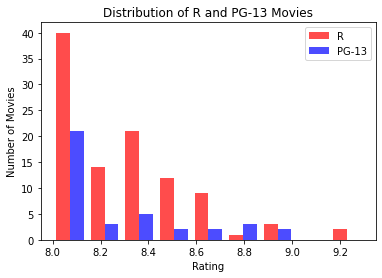

In [5]:
"""Q2: 
Using numpy and pyplot, make an overlapping histogram that shows the score distribution vs. count of R-Rated movies and PG-13 ones.
Describe your plot. 

Save your plot in a variable called plt2, and your dataframes in variables called df_R and df_PG13
"""

import matplotlib.pyplot as plt2

# your code here

df_R = df[df['content_rating'] == 'R']
df_PG13 = df[df['content_rating'] == 'PG-13']
df_PG13.head()


R_score = df_R['imdb_score']
PG13_score = df_PG13['imdb_score']
PG13_score.head()


plt2.hist(
    [R_score, PG13_score],
    alpha = 0.7,
    color = ['red', 'blue'],
    label = ['R', 'PG-13'],
    bins = 'auto'
)

plt2.xlabel('Rating')
plt2.ylabel('Number of Movies')

plt2.legend(loc = 'best')

plt2.title('Distribution of R and PG-13 Movies')

plt2.show() 

In [6]:
assert_frame_equal(df_R, sol.df_R)
assert_frame_equal(df_PG13, sol.df_PG13)
np.testing.assert_array_equal(plt2, sol.plt2)
print("Success!")

Success!
